<a href="https://colab.research.google.com/github/ZahraDehghani99/AI-Internship/blob/master/Text%20models/Text_Emotion_Recogniton2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Emotion Recogniton 

Text Emotion Recogniton using [BERT-base-uncased](https://huggingface.co/bert-base-uncased) model.

In [1]:
!pip install -q transformers datasets wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [5]:
!nvidia-smi

Tue Feb 21 12:57:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    27W /  70W |      3MiB / 15360MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Load dataset from hugging face hub

In [7]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [8]:
from datasets import load_dataset, Audio

iemocap_text = load_dataset("Zahra99/IEMOCAP_Text")

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating session2 split:   0%|          | 0/1023 [00:00<?, ? examples/s]

Generating session5 split:   0%|          | 0/1241 [00:00<?, ? examples/s]

Generating session1 split:   0%|          | 0/1085 [00:00<?, ? examples/s]

Generating session3 split:   0%|          | 0/1151 [00:00<?, ? examples/s]

Generating session4 split:   0%|          | 0/1031 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Zahra99___parquet/Zahra99--IEMOCAP_Text-96d9699f03987401/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
iemocap_text

DatasetDict({
    session2: Dataset({
        features: ['text', 'label'],
        num_rows: 1023
    })
    session5: Dataset({
        features: ['text', 'label'],
        num_rows: 1241
    })
    session1: Dataset({
        features: ['text', 'label'],
        num_rows: 1085
    })
    session3: Dataset({
        features: ['text', 'label'],
        num_rows: 1151
    })
    session4: Dataset({
        features: ['text', 'label'],
        num_rows: 1031
    })
})

In [10]:
iemocap_text["session1"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['ang', 'hap', 'neu', 'sad'], id=None)}

In [ ]:
iemocap_text["session1"][0]

{'text': 'Next.', 'label': 0}

In [11]:
labels = iemocap_text["session1"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [12]:
id2label[str(0)]

'ang'

## Split train, valid and test

let's split trian, valid and test dataset. We use the first three sessions of the IEMOCAP dataset as training, the fourth session as validation and fifth session as the test set.

In [13]:
from datasets import concatenate_datasets

iemocap_train = concatenate_datasets([iemocap_text['session1'], iemocap_text['session2'], iemocap_text['session3']])  
iemocap_valid = iemocap_text['session4']
iemocap_test = iemocap_text['session5']

In [14]:
iemocap_train

Dataset({
    features: ['text', 'label'],
    num_rows: 3259
})

In [13]:
iemocap_train[1084]

{'text': 'Well, I can see that.', 'label': 0}

In [14]:
iemocap_train["label"][:20]

[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2]

In [15]:
shuffled_iemocap_train = iemocap_train.shuffle(seed=42)

In [13]:
shuffled_iemocap_train[1084]

{'text': "And you'll always have that and--you should feel, you know, happy for him that he got to do so much before--I mean, and even after he found out last year. I mean--",
 'label': 2}

In [16]:
shuffled_iemocap_train

Dataset({
    features: ['text', 'label'],
    num_rows: 3259
})

In [14]:
shuffled_iemocap_train["label"][:20]

[1, 2, 1, 3, 1, 2, 2, 2, 3, 0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 1]

Let's put these splits in one `DataDict` and create a new dataset with them.

In [16]:
from datasets import DatasetDict
dataset = DatasetDict({
                    "train": shuffled_iemocap_train,   
                    "valid": iemocap_valid,
                    "test": iemocap_test
})

In [17]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3259
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1031
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1241
    })
})

In [18]:
dataset['valid'][0]

{'text': "What time is it? They're supposed to run around midnight. This is great isn't it? Look at this night we've got here. It couldn't be better.",
 'label': 1}

## Define needed functions

### Defining the performance metrics

In [19]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids 
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

### Defining Confusion matrix

In [20]:
classes = ["ang", "hap", "neu", "sad"]

In [21]:
def confusion_matrix(y_test, y_pred):
  labels = [i for i in range(len(list(set(y_test))))]
  df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = labels,
                columns = labels)
  plt.figure(figsize=(8,6))
  ax= plt.subplot()
  sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g', ax=ax)
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  class_names= classes
  ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
  plt.tight_layout()
  plt.show()

### Defining the int2label

In [22]:
def inverse(idx):
  inv = {0: "ang",
         1: "hap",
         2: "neu",
         3: "sad"}
  return inv[idx]         

### Defining Forward pass loss

In [23]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  # Place all input tensors on the same device as the model
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                        reduction="none")
  # Place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(),
  "predicted_label": pred_label.cpu().numpy()}

## Emotion Recognition using BERT v1.0 Model



### Tokenizing the whole dataset

In [24]:
from transformers import set_seed

set_seed(42)

In [25]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [26]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [27]:
tokenizer.vocab_size

30522

In [28]:
tokenizer.model_max_length

512

In [29]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [30]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [31]:
print(tokenize(dataset["train"][0]))

{'input_ids': [101, 1045, 2074, 2288, 2046, 2009, 1012, 1045, 2074, 2785, 1997, 3062, 2046, 2009, 1012, 6719, 1045, 2001, 3788, 2105, 1998, 1012, 1012, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [32]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [33]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


### Fine-Tunning Transformers

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [34]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [34]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

As we can see this Bert model has 12 layers.

In [32]:
model.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [33]:
model.classifier

Linear(in_features=768, out_features=4, bias=True)

### Training the model

In [ ]:
# {'learning_rate': 4.1638831395652454e-05,
#  'num_train_epochs': 5,
#  'seed': 38,
#  'per_device_train_batch_size': 16}

In [35]:
from transformers import Trainer, TrainingArguments

batch_size = 32 
# batch_size = 16
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-iemocap6"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10, #
                                  learning_rate=4e-5, #
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error",
                                  report_to = 'wandb',
                                  run_name = 'BERT-fine-tuning')

In [36]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

Cloning https://huggingface.co/Zahra99/bert-base-uncased-finetuned-iemocap6 into local empty directory.


In [37]:
import torch
torch.cuda.empty_cache()

In [38]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  428791 KB |  428791 KB |  428791 KB |       0 B  |
|       from large pool |  428288 KB |  428288 KB |  428288 KB |       0 B  |
|       from small pool |     503 KB |     503 KB |     503 KB |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |  428791 KB |  428791 KB |  428791 KB |       0 B  |
|       from large pool |  428288 KB |  428288 KB |  428288 KB |

In [31]:
# torch.cuda.init()

In [39]:
trainer.evaluate()

wandb: Currently logged in as: zdehghanitafti78 (affective-computing). Use `wandb login --relogin` to force relogin


{'eval_loss': 1.5504390001296997,
 'eval_accuracy': 0.13870029097963144,
 'eval_f1': 0.033817803256755825,
 'eval_runtime': 9.3092,
 'eval_samples_per_second': 110.751,
 'eval_steps_per_second': 3.545}

In [40]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.162800,1.042141,0.572260,0.581183
2,0.729300,0.919991,0.640155,0.637755
3,0.462800,0.903893,0.678952,0.688779
4,0.298600,1.059715,0.658584,0.668030
5,0.234700,1.134007,0.677983,0.684262
6,0.185900,1.202197,0.664403,0.666543
7,0.163400,1.229159,0.677983,0.681079
8,0.128300,1.297188,0.677983,0.683386
9,0.123700,1.387711,0.674103,0.681611
10,0.109300,1.408761,0.677013,0.682787


TrainOutput(global_step=1020, training_loss=0.3573551216546227, metrics={'train_runtime': 683.5623, 'train_samples_per_second': 47.677, 'train_steps_per_second': 1.492, 'total_flos': 1808777096717760.0, 'train_loss': 0.3573551216546227, 'epoch': 10.0})

In [34]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.242900,1.180480,0.488846,0.487161
2,0.893700,0.952851,0.618817,0.625316
3,0.628600,0.867566,0.657614,0.665103
4,0.440300,0.929026,0.662464,0.667540
5,0.345900,0.988329,0.659554,0.664330
6,0.275700,1.031955,0.652764,0.663871
7,0.224900,1.069998,0.662464,0.671975
8,0.187200,1.114159,0.664403,0.669147
9,0.173000,1.113996,0.661494,0.669771
10,0.149100,1.117866,0.664403,0.671488


TrainOutput(global_step=1020, training_loss=0.45308473869866017, metrics={'train_runtime': 734.941, 'train_samples_per_second': 44.344, 'train_steps_per_second': 1.388, 'total_flos': 1808777096717760.0, 'train_loss': 0.45308473869866017, 'epoch': 10.0})

### Evaluation on the Test set

In [41]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [42]:
preds_output_test.metrics

{'test_loss': 1.3719929456710815,
 'test_accuracy': 0.6809024979854955,
 'test_f1': 0.6835822176597842,
 'test_runtime': 8.3787,
 'test_samples_per_second': 148.113,
 'test_steps_per_second': 4.655}

In [43]:
y_test = np.array(dataset_encoded["test"]["label"])

In [44]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

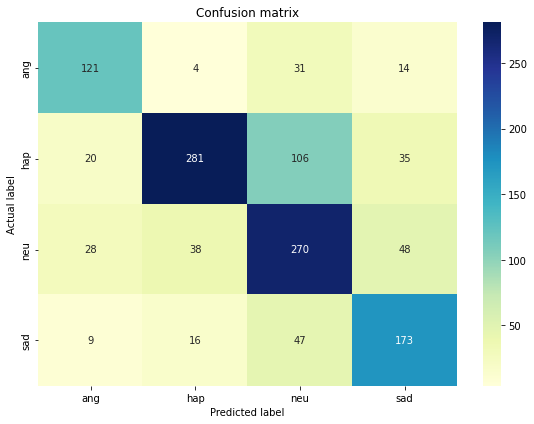

In [45]:
confusion_matrix(y_test, y_preds_test)

In [46]:
print(classification_report(y_test, y_preds_test))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       170
           1       0.83      0.64      0.72       442
           2       0.59      0.70      0.64       384
           3       0.64      0.71      0.67       245

    accuracy                           0.68      1241
   macro avg       0.69      0.69      0.68      1241
weighted avg       0.70      0.68      0.68      1241



In [44]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [45]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [46]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
196,I did want to see it. I always want to see it....,sad,ang,9.574986
114,The whole business is really rather ridiculous.,neu,hap,9.343440
390,"You won't have trouble, You won't have trouble.",hap,ang,9.163697
652,This what? What is this? This isn't even anyth...,sad,ang,9.035974
191,It's ridiculous.,neu,ang,8.935886
730,Well I don't know why you wouldn't believe that.,neu,hap,8.934242
1196,Yeah. Let me just call security.,neu,ang,8.914762
606,Don't laugh at me. I'm serious.,neu,hap,8.891938
916,"Oh, this- this form that you have is the wrong...",neu,ang,8.859535
935,Okay good. I I assumed.,hap,neu,8.773450


### Test the pipeline with a sample text

In [47]:
from transformers import pipeline

model_id = "Zahra99/bert-base-uncased-finetuned-iemocap5"
classifier = pipeline("text-classification", model=model_id)

In [48]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

In [49]:
preds

[[{'label': 'LABEL_0', 'score': 0.0009998237947002053},
  {'label': 'LABEL_1', 'score': 0.01898624189198017},
  {'label': 'LABEL_2', 'score': 0.0022080412600189447},
  {'label': 'LABEL_3', 'score': 0.9778059720993042}]]

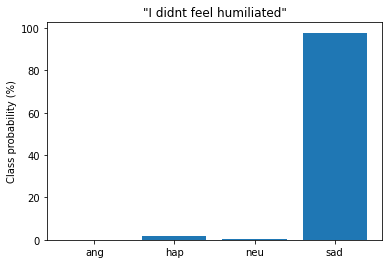

In [50]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (5,3)
plt.show()

## Hyperparameter search (BERT)

### Tokenizing the whole dataset

In [ ]:
model_name = 'bert-base-uncased'
num_labels = 4

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

change max_legnth to 100

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [101, 1045, 2074, 2288, 2046, 2009, 1012, 1045, 2074, 2785, 1997, 3062, 2046, 2009, 1012, 6719, 1045, 2001, 3788, 2105, 1998, 1012, 1012, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


The `Trainer` supports hyperparameter search using [optuna](https://optuna.org/) or [Ray Tune](https://docs.ray.io/en/latest/tune/). For this last section you will need either of those libraries installed, just uncomment the line you want on the next cell and run it.

In [ ]:
! pip install -q optuna
! pip install -q ray[tune]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 51.5 MB/s eta 0:00:00


### Fine-Tunning Transformers

During hyperparameter search, the `Trainer` will run several trainings, so it needs to have the model defined via a function (so it can be reinitialized at each new run) instead of just having it passed. We just use the same function as before:

In [ ]:
from transformers import AutoModelForSequenceClassification
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(dataset_encoded["train"]) // batch_size
model_path = f"{model_name}-finetuned-iemocap-uptuna3"
training_args = TrainingArguments(output_dir=model_path,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  seed=42,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

And we can instantiate our `Trainer` like before:

The method we call this time is `hyperparameter_search`. Note that it can take a long time to run on the full dataset for some of the tasks. You can try to find some good hyperparameter on a portion of the training dataset by replacing the `train_dataset` line above by:
```python
train_dataset = encoded_dataset["train"].shard(index=1, num_shards=10) 
```
for 1/10th of the dataset. Then you can run a full training on the best hyperparameters picked by the search.

In [ ]:
train_dataset = dataset_encoded["train"].shard(index=1, num_shards=2) 

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1629
})

In [ ]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dataset_encoded["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Cloning https://huggingface.co/Zahra99/bert-base-uncased-finetuned-iemocap-uptuna3 into local empty directory.


In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

[I 2023-02-20 13:04:16,754] A new study created in memory with name: no-name-5994ea82-7406-465b-89cb-192bc5873c62


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.382100,1.440360,0.253152,0.129411
2,1.343200,1.418833,0.260912,0.139197
3,1.320200,1.389858,0.277401,0.174899
4,1.305400,1.379879,0.284190,0.186343
5,1.292400,1.375903,0.290980,0.197049


[I 2023-02-20 13:07:55,023] Trial 0 finished with value: 0.4880281643058746 and parameters: {'learning_rate': 1.5069441716212317e-06, 'num_train_epochs': 5, 'seed': 27, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 0.4880281643058746.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.210223,0.478177,0.480812
2,No log,1.139954,0.533463,0.541894


[I 2023-02-20 13:09:07,349] Trial 1 finished with value: 1.0753567373145374 and parameters: {'learning_rate': 3.7461148419980956e-05, 'num_train_epochs': 2, 'seed': 12, 'per_device_train_batch_size': 64}. Best is trial 1 with value: 1.0753567373145374.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.389633,0.248303,0.099785


[I 2023-02-20 13:09:44,577] Trial 2 finished with value: 0.34808778338787316 and parameters: {'learning_rate': 2.7188165211608764e-06, 'num_train_epochs': 1, 'seed': 11, 'per_device_train_batch_size': 64}. Best is trial 1 with value: 1.0753567373145374.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.400126,0.247333,0.107792


[I 2023-02-20 13:10:23,789] Trial 3 finished with value: 0.3551243091862827 and parameters: {'learning_rate': 2.1186424642536904e-06, 'num_train_epochs': 1, 'seed': 36, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 1.0753567373145374.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.330397,0.314258,0.220289
2,1.236700,1.214019,0.476237,0.473601
3,1.236700,1.174244,0.528613,0.532700
4,0.985500,1.156505,0.531523,0.535134


[I 2023-02-20 13:12:53,161] Trial 4 finished with value: 1.0666562943306546 and parameters: {'learning_rate': 1.4237406900458476e-05, 'num_train_epochs': 4, 'seed': 10, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 1.0753567373145374.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.317831,0.409311,0.344960
2,1.294800,1.286863,0.426770,0.362216


[I 2023-02-20 13:14:10,276] Trial 5 finished with value: 0.7889865711985685 and parameters: {'learning_rate': 1.0868280957974422e-05, 'num_train_epochs': 2, 'seed': 40, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 1.0753567373145374.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.389243,0.287100,0.209252


[I 2023-02-20 13:14:46,907] Trial 6 pruned. 


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.064214,0.562561,0.566054
2,0.970800,1.011440,0.609117,0.617271
3,0.970800,1.160180,0.619787,0.627922
4,0.315800,1.188342,0.637245,0.646048


[I 2023-02-20 13:17:16,591] Trial 7 finished with value: 1.2832936155678485 and parameters: {'learning_rate': 7.02440092524987e-05, 'num_train_epochs': 4, 'seed': 10, 'per_device_train_batch_size': 32}. Best is trial 7 with value: 1.2832936155678485.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.229836,0.482056,0.472733
2,No log,1.064951,0.562561,0.570221
3,No log,1.000364,0.598448,0.604776


[I 2023-02-20 13:19:02,665] Trial 8 finished with value: 1.2032241834170607 and parameters: {'learning_rate': 5.2079120774372424e-05, 'num_train_epochs': 3, 'seed': 16, 'per_device_train_batch_size': 64}. Best is trial 7 with value: 1.2832936155678485.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.184300,0.955119,0.624636,0.627433
2,0.694200,0.988070,0.628516,0.638848
3,0.379900,1.206799,0.600388,0.602898
4,0.224400,1.287213,0.644035,0.651167
5,0.154200,1.356717,0.650824,0.657130


[I 2023-02-20 13:23:01,417] Trial 9 finished with value: 1.307954218032685 and parameters: {'learning_rate': 4.1638831395652454e-05, 'num_train_epochs': 5, 'seed': 38, 'per_device_train_batch_size': 16}. Best is trial 9 with value: 1.307954218032685.


The `hyperparameter_search` method returns a `BestRun` objects, which contains the value of the objective maximized (by default the sum of all metrics) and the hyperparameters it used for that run.

In [ ]:
best_run

BestRun(run_id='9', objective=1.307954218032685, hyperparameters={'learning_rate': 4.1638831395652454e-05, 'num_train_epochs': 5, 'seed': 38, 'per_device_train_batch_size': 16})

You can customize the objective to maximize by passing along a `compute_objective` function to the `hyperparameter_search` method, and you can customize the search space by passing a `hp_space` argument to `hyperparameter_search`. See this [forum post](https://discuss.huggingface.co/t/using-hyperparameter-search-in-trainer/785/10) for some examples.

To reproduce the best training, just set the hyperparameters in your `TrainingArgument` before creating a `Trainer`:

### Train a new model using best parameters

In [ ]:
best_run.hyperparameters.items()

dict_items([('learning_rate', 4.1638831395652454e-05), ('num_train_epochs', 5), ('seed', 38), ('per_device_train_batch_size', 16)])

In [ ]:
best_run_hyperparameters  = dict(best_run.hyperparameters.items())

In [ ]:
best_run_hyperparameters

{'learning_rate': 4.1638831395652454e-05,
 'num_train_epochs': 5,
 'seed': 38,
 'per_device_train_batch_size': 16}

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True).to(device))

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

/content/bert-base-uncased-finetuned-iemocap-uptuna3 is already a clone of https://huggingface.co/Zahra99/bert-base-uncased-finetuned-iemocap-uptuna3. Make sure you pull the latest changes with `repo.git_pull()`.


using best parameters

In [ ]:
for n, v in best_run_hyperparameters.items():
    setattr(trainer.args, n, v)

In [ ]:
trainer.args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_n

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    2105 MB |    6786 MB |   18778 GB |   18776 GB |
|       from large pool |    2103 MB |    6782 MB |   18578 GB |   18575 GB |
|       from small pool |       2 MB |       4 MB |     200 GB |     200 GB |
|---------------------------------------------------------------------------|
| Active memory         |    2105 MB |    6786 MB |   18778 GB |   18776 GB |
|       from large pool |    2103 MB |    6782 MB |   18578 GB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.952200,0.864988,0.674103,0.677130
2,0.590100,0.856020,0.677013,0.680900
3,0.375400,1.035169,0.664403,0.673041
4,0.274200,1.099481,0.673133,0.680402
5,0.209900,1.192690,0.677013,0.683779


TrainOutput(global_step=1020, training_loss=0.5050353039713467, metrics={'train_runtime': 436.9876, 'train_samples_per_second': 37.289, 'train_steps_per_second': 2.334, 'total_flos': 904388548358880.0, 'train_loss': 0.5050353039713467, 'epoch': 5.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 1.1354135274887085,
 'test_accuracy': 0.6873489121676067,
 'test_f1': 0.6906482817468186,
 'test_runtime': 8.5158,
 'test_samples_per_second': 145.729,
 'test_steps_per_second': 4.58}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

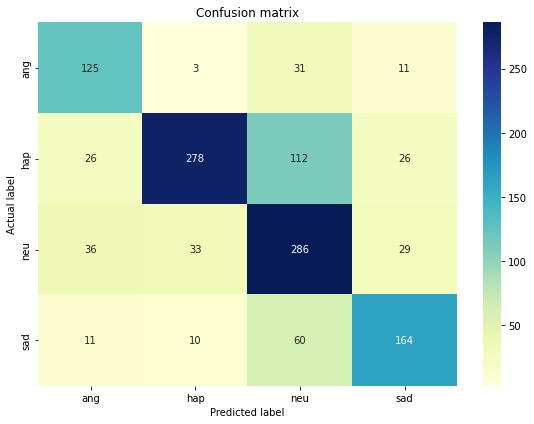

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
print(classification_report(y_test, y_preds_test))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       170
           1       0.86      0.63      0.73       442
           2       0.58      0.74      0.66       384
           3       0.71      0.67      0.69       245

    accuracy                           0.69      1241
   macro avg       0.70      0.69      0.69      1241
weighted avg       0.71      0.69      0.69      1241



In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
93,"You know why I asked Annie here, don't you?",sad,neu,7.207755
394,because I am not getting married.,hap,ang,6.681708
331,I know me neither.,hap,sad,6.668313
1032,"I know it's really crappy timing, but I don't ...",sad,hap,6.613227
438,"I don't know ""sigh"".",sad,hap,6.579477
736,"No, I don't think I am. I like have a whole bu...",ang,sad,6.578800
1068,"I mean, one second you think, you know, you're...",sad,neu,6.482654
1239,"Yeah, well thanks for your help.",ang,neu,6.475343
819,"Yes of course, of course.",sad,neu,6.465703
534,From your father's point of view he's not dead...,ang,neu,6.453555


### Test the pipeline with a sample news

In [ ]:
from transformers import pipeline

model_id = "Zahra99/bert-base-uncased-finetuned-iemocap-uptuna3"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

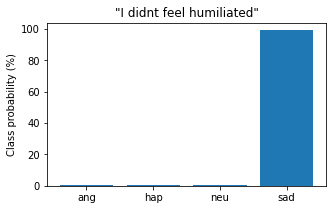

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

## Hyperparameter search (Roberta)

### Tokenizing the whole dataset

tokeniziation with GPT2 and then give the tokenizing text to pretrained Roberta  

In [ ]:
model_name = 'roberta-base'
num_labels = 4

In [ ]:
from transformers import AutoTokenizer, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [ ]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)})

In [ ]:
tokenizer.vocab_size

50257

In [ ]:
tokenizer.model_max_length

1024

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

In [ ]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '[PAD]'})

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [5195, 750, 339, 14037, 607, 994, 30], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


The `Trainer` supports hyperparameter search using [optuna](https://optuna.org/) or [Ray Tune](https://docs.ray.io/en/latest/tune/). For this last section you will need either of those libraries installed, just uncomment the line you want on the next cell and run it.

In [ ]:
! pip install -q optuna
! pip install -q ray[tune]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 28.4 MB/s eta 0:00:00


### Fine-Tunning Transformers

During hyperparameter search, the `Trainer` will run several trainings, so it needs to have the model defined via a function (so it can be reinitialized at each new run) instead of just having it passed. We just use the same function as before:

In [ ]:
from transformers import AutoModelForSequenceClassification
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(dataset_encoded["train"]) // batch_size
model_path = f"/content/drive/MyDrive/Affective Computing/models/{model_name}-finetuned-iemocap-uptuna"
training_args = TrainingArguments(output_dir=model_path,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

And we can instantiate our `Trainer` like before:

The method we call this time is `hyperparameter_search`. Note that it can take a long time to run on the full dataset for some of the tasks. You can try to find some good hyperparameter on a portion of the training dataset by replacing the `train_dataset` line above by:
```python
train_dataset = encoded_dataset["train"].shard(index=1, num_shards=10) 
```
for 1/10th of the dataset. Then you can run a full training on the best hyperparameters picked by the search.

In [ ]:
train_dataset = dataset_encoded["train"].shard(index=1, num_shards=10) 

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 326
})

In [ ]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dataset_encoded["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

[I 2023-02-07 12:44:14,424] A new study created in memory with name: no-name-9e128b9c-46a9-425f-b302-bf842418c9b9


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.390441,0.257032,0.114293
2,No log,1.383774,0.250242,0.100175
3,1.364300,1.384727,0.289040,0.185709
4,1.364300,1.390129,0.283220,0.193669
5,1.334000,1.392694,0.289040,0.197320


[I 2023-02-07 12:45:25,490] Trial 0 finished with value: 0.4863599697602784 and parameters: {'learning_rate': 1.0531306792121389e-05, 'num_train_epochs': 5, 'seed': 39, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.4863599697602784.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.393372,0.172648,0.108863
2,No log,1.391820,0.256062,0.149592
3,No log,1.391328,0.264791,0.149493


[I 2023-02-07 12:46:03,193] Trial 1 finished with value: 0.4142841296244265 and parameters: {'learning_rate': 1.9383124424942617e-06, 'num_train_epochs': 3, 'seed': 34, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 0.4863599697602784.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.388009,0.293889,0.135190
2,No log,1.383871,0.285160,0.182760
3,1.380500,1.382137,0.259942,0.168985
4,1.380500,1.382067,0.261882,0.172924


[I 2023-02-07 12:46:58,592] Trial 2 finished with value: 0.43480607230592017 and parameters: {'learning_rate': 3.627583890606882e-06, 'num_train_epochs': 4, 'seed': 34, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.4863599697602784.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.409314,0.247333,0.121977


[I 2023-02-07 12:47:14,617] Trial 3 finished with value: 0.36930969007392633 and parameters: {'learning_rate': 1.0436556078912758e-05, 'num_train_epochs': 1, 'seed': 10, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.4863599697602784.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.373310,0.295829,0.200189
2,No log,1.373764,0.296799,0.214423
3,No log,1.373749,0.290010,0.204690


[I 2023-02-07 12:47:53,674] Trial 4 finished with value: 0.4946999036289999 and parameters: {'learning_rate': 2.26273433096267e-06, 'num_train_epochs': 3, 'seed': 1, 'per_device_train_batch_size': 16}. Best is trial 4 with value: 0.4946999036289999.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.383449,0.250242,0.100175
2,No log,1.383424,0.250242,0.100252


[I 2023-02-07 12:48:17,675] Trial 5 finished with value: 0.3504949063503443 and parameters: {'learning_rate': 3.252043694637799e-05, 'num_train_epochs': 2, 'seed': 23, 'per_device_train_batch_size': 64}. Best is trial 4 with value: 0.4946999036289999.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.376309,0.293889,0.133606
2,1.387200,1.377223,0.261882,0.143667


[I 2023-02-07 12:48:52,626] Trial 6 pruned. 


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.384893,0.288070,0.202945
2,No log,1.384073,0.254122,0.114802


[I 2023-02-07 12:49:16,990] Trial 7 finished with value: 0.3689246167072233 and parameters: {'learning_rate': 2.1292086882563263e-05, 'num_train_epochs': 2, 'seed': 33, 'per_device_train_batch_size': 64}. Best is trial 4 with value: 0.4946999036289999.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.392873,0.145490,0.048602


[I 2023-02-07 12:49:35,607] Trial 8 pruned. 


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.385308,0.251212,0.102257
2,No log,1.386396,0.250242,0.100175
3,No log,1.389354,0.250242,0.100175
4,No log,1.389860,0.250242,0.100175
5,No log,1.389086,0.250242,0.100175


[I 2023-02-07 12:50:36,783] Trial 9 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 1.218079194852565e-05, 'num_train_epochs': 5, 'seed': 28, 'per_device_train_batch_size': 32}. Best is trial 4 with value: 0.4946999036289999.


The `hyperparameter_search` method returns a `BestRun` objects, which contains the value of the objective maximized (by default the sum of all metrics) and the hyperparameters it used for that run.

In [ ]:
best_run

BestRun(run_id='4', objective=0.4946999036289999, hyperparameters={'learning_rate': 2.26273433096267e-06, 'num_train_epochs': 3, 'seed': 1, 'per_device_train_batch_size': 16})

You can customize the objective to maximize by passing along a `compute_objective` function to the `hyperparameter_search` method, and you can customize the search space by passing a `hp_space` argument to `hyperparameter_search`. See this [forum post](https://discuss.huggingface.co/t/using-hyperparameter-search-in-trainer/785/10) for some examples.

To reproduce the best training, just set the hyperparameters in your `TrainingArgument` before creating a `Trainer`:

### Train a new model using best parameters

In [ ]:
best_run.hyperparameters.items()

dict_items([('learning_rate', 2.26273433096267e-06), ('num_train_epochs', 3), ('seed', 1), ('per_device_train_batch_size', 16)])

In [ ]:
# f = open("/content/drive/MyDrive/Affective Computing/Roberta_best_run.hyperparameters.pkl","wb")

# # write the python object (dict) to pickle file
# pickle.dump(list(best_run.hyperparameters.items()),f)

# # close file
# f.close()

In [ ]:
with open('/content/drive/MyDrive/Affective Computing/Roberta_best_run.hyperparameters.pkl', 'rb') as f:
    best_run_hyperparameters = pickle.load(f)

In [ ]:
best_run_hyperparameters = dict(best_run_hyperparameters)
best_run_hyperparameters.items()

dict_items([('learning_rate', 2.26273433096267e-06), ('num_train_epochs', 3), ('seed', 1), ('per_device_train_batch_size', 16)])

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True).to(device))

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

using best parameters

In [ ]:
for n, v in best_run_hyperparameters.items():
    setattr(trainer.args, n, v)

In [ ]:
trainer.args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_n

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    2401 MB |    6853 MB |    6359 GB |    6356 GB |\n|       from large pool |    2398 MB |    6849 MB |    6217 GB |    6214 GB |\n|       from small pool |       2 MB |      70 MB |     142 GB |     142 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    2401 MB |    6853 MB |    6359 GB |    6356 GB |\n|       from large pool |    2398 MB |    6849 MB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.369400,1.397370,0.259942,0.122790
2,1.350200,1.393209,0.278371,0.167424
3,1.350200,1.390584,0.281280,0.175916


TrainOutput(global_step=612, training_loss=1.3614005730822196, metrics={'train_runtime': 217.3228, 'train_samples_per_second': 44.988, 'train_steps_per_second': 2.816, 'total_flos': 527559986542680.0, 'train_loss': 1.3614005730822196, 'epoch': 3.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 1.326450228691101,
 'test_accuracy': 0.35132957292506045,
 'test_f1': 0.2526179377816926,
 'test_runtime': 8.7086,
 'test_samples_per_second': 142.503,
 'test_steps_per_second': 4.478}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

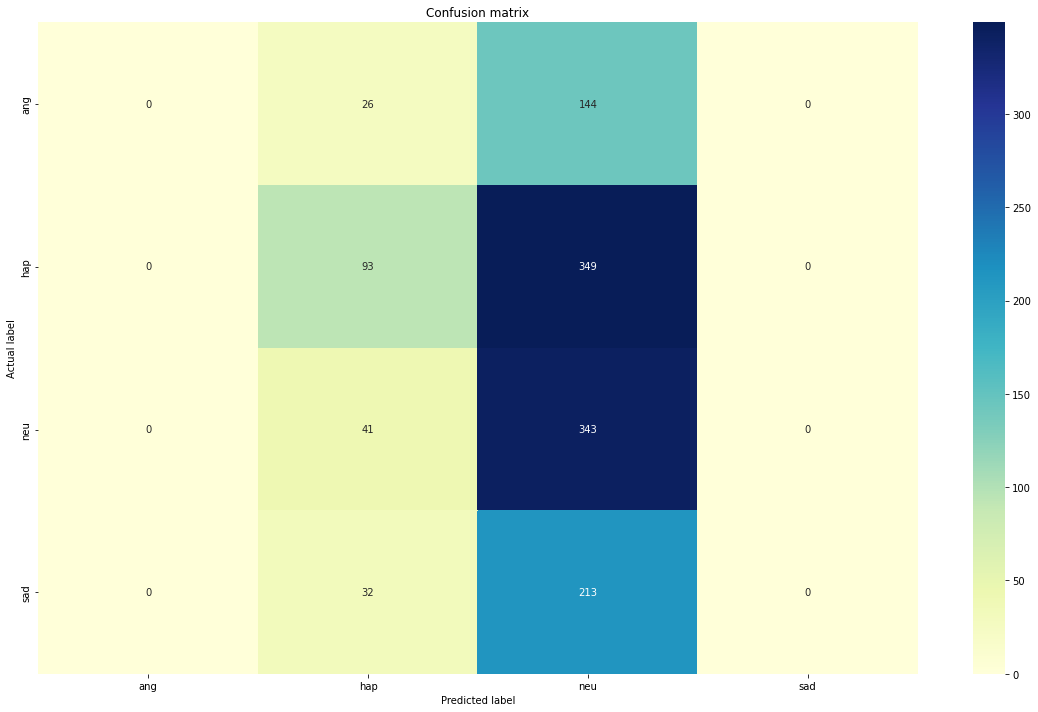

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       170\n           1       0.48      0.21      0.29       442\n           2       0.33      0.89      0.48       384\n           3       0.00      0.00      0.00       245\n\n    accuracy                           0.35      1241\n   macro avg       0.20      0.28      0.19      1241\nweighted avg       0.27      0.35      0.25      1241\n'

In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
291,Beast,ang,neu,1.924951
240,I can't help it!,ang,neu,1.914415
293,Brute,ang,neu,1.882867
258,They snap.,ang,neu,1.857320
22,They snap.,ang,neu,1.857320
825,I can't imagine what his- what his parents are...,sad,neu,1.849144
21,They sting.,ang,neu,1.847380
43,I hate you.,ang,neu,1.841991
685,I can't help it.,ang,neu,1.838502
280,Very amusing indeed.,ang,neu,1.828548


### Test the pipeline with a sample news

In [ ]:
from transformers import pipeline

model_id = "/content/drive/MyDrive/Affective Computing/models/roberta-base-finetuned-iemocap-uptuna/checkpoint-500"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

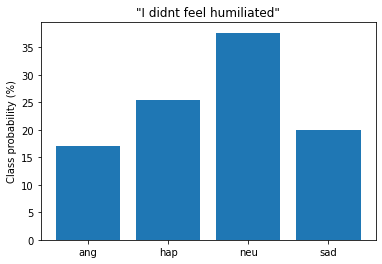

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

## Emotion Recognition using Roberta v1.0 Model



### Tokenizing the whole dataset

tokeniziation with GPT2 and then give the tokenizing text to pretrained Roberta  

In [ ]:
from transformers import AutoTokenizer, GPT2Tokenizer

model_ckpt = "roberta-base"
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [ ]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True)})

In [ ]:
tokenizer.vocab_size

50257

In [ ]:
tokenizer.model_max_length

1024

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

اینجا رو تغییر دادم. در سایز ورودی فکر کنم مشکل داره.

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [5195, 750, 339, 14037, 607, 994, 30], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Fine-Tunning Transformers

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
model.roberta

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [ ]:
model.classifier

RobertaClassificationHead(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out_proj): Linear(in_features=768, out_features=4, bias=True)
)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32 
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"/content/drive/MyDrive/Affective Computing/models/{model_ckpt}-finetuned-iemocap"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  488181 KB |  488181 KB |  488181 KB |       0 B  |\n|       from large pool |  487680 KB |  487680 KB |  487680 KB |       0 B  |\n|       from small pool |     501 KB |     501 KB |     501 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |  488181 KB |  488181 KB |  488181 KB |       0 B  |\n|       from large pool |  487680 KB |  487680 KB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.362300,1.383564,0.320078,0.249713
2,1.273100,1.263969,0.407371,0.387407
3,1.126800,1.266154,0.461688,0.463368
4,0.990900,1.219095,0.510184,0.517284
5,0.865800,1.258911,0.514064,0.520584
6,0.759200,1.244426,0.536372,0.545745
7,0.671800,1.239962,0.543162,0.552699
8,0.613200,1.246505,0.564500,0.571048
9,0.561400,1.289982,0.565470,0.574194
10,0.522300,1.294126,0.561591,0.569719


TrainOutput(global_step=1020, training_loss=0.8706429093491798, metrics={'train_runtime': 680.5369, 'train_samples_per_second': 47.889, 'train_steps_per_second': 1.499, 'total_flos': 1758533288475600.0, 'train_loss': 0.8706429093491798, 'epoch': 10.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 1.3087100982666016,
 'test_accuracy': 0.5431103948428686,
 'test_f1': 0.545267321793523,
 'test_runtime': 9.0697,
 'test_samples_per_second': 136.829,
 'test_steps_per_second': 4.3}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

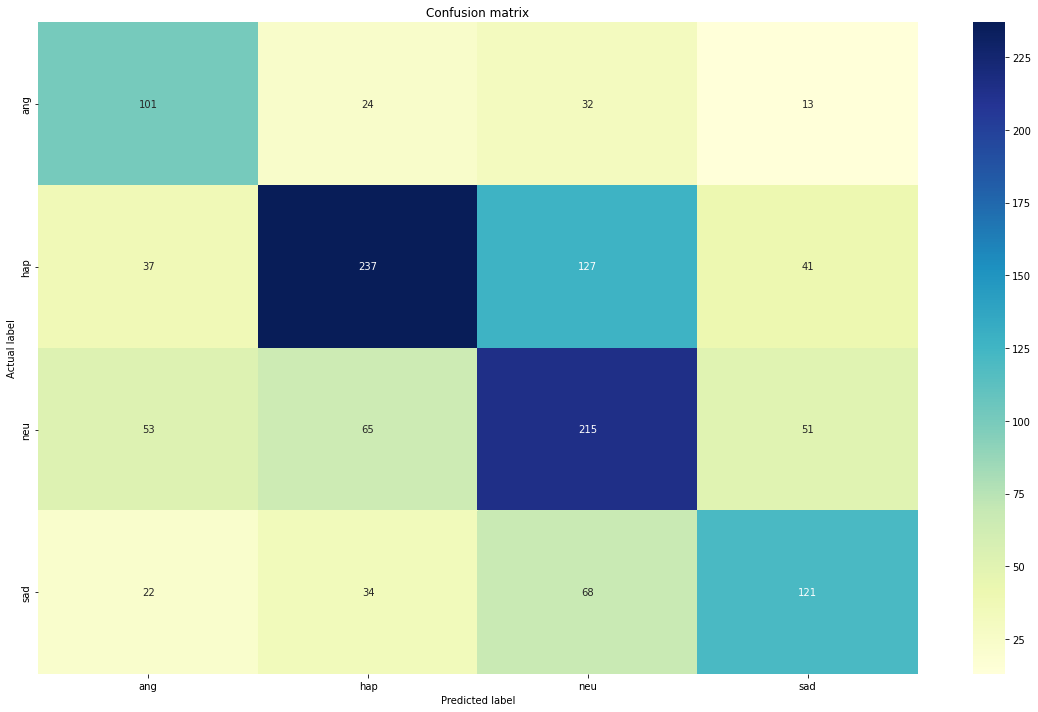

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.47      0.59      0.53       170\n           1       0.66      0.54      0.59       442\n           2       0.49      0.56      0.52       384\n           3       0.54      0.49      0.51       245\n\n    accuracy                           0.54      1241\n   macro avg       0.54      0.55      0.54      1241\nweighted avg       0.56      0.54      0.55      1241\n'

In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1038,What would be the worst that would happen if t...,neu,ang,5.884794
926,"Well, that's unfortunate, sir. You're gonna ha...",ang,neu,5.858044
497,Okay? Can you tell me what that says?,neu,ang,5.785335
738,It's not like I can go to Kmart and buy another.,ang,sad,5.759947
825,I can't imagine what his- what his parents are...,sad,hap,5.734443
685,I can't help it.,ang,sad,5.700074
238,You've got to believe. You've got to--,sad,ang,5.600861
11,I don't see why you want any. You've already h...,neu,ang,5.594325
652,This what? What is this? This isn't even anyth...,sad,ang,5.552999
788,Would you be willing to make some more calls o...,sad,ang,5.477038


### Test the pipeline with a sample text

In [ ]:
from transformers import pipeline

model_id = "/content/drive/MyDrive/Affective Computing/models/roberta-base-finetuned-iemocap/checkpoint-1000"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

In [ ]:
preds

[[{'label': 'LABEL_0', 'score': 0.010428539477288723},
  {'label': 'LABEL_1', 'score': 0.05313273146748543},
  {'label': 'LABEL_2', 'score': 0.4782799184322357},
  {'label': 'LABEL_3', 'score': 0.45815882086753845}]]

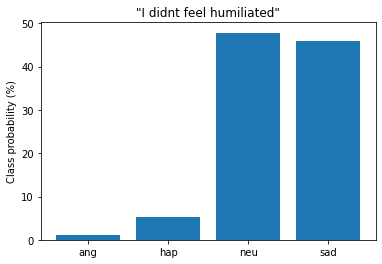

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (5,3)
plt.show()

## Emotion Recognition using Roberta v2.0 Model



### Tokenizing the whole dataset

In this part we use roberta for tokenization and classification.

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [ ]:
tokenizer.vocab_size

50265

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
# tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

اینجا رو تغییر دادم. در سایز ورودی فکر کنم مشکل داره.

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [0, 7608, 222, 37, 9603, 69, 259, 116, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Fine-Tunning Transformers

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
model.roberta

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [ ]:
model.classifier

RobertaClassificationHead(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out_proj): Linear(in_features=768, out_features=4, bias=True)
)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32 
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"/content/drive/MyDrive/Affective Computing/models/{model_ckpt}-finetuned-iemocap"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  488181 KB |  488181 KB |  488181 KB |       0 B  |\n|       from large pool |  487680 KB |  487680 KB |  487680 KB |       0 B  |\n|       from small pool |     501 KB |     501 KB |     501 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |  488181 KB |  488181 KB |  488181 KB |       0 B  |\n|       from large pool |  487680 KB |  487680 KB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.249500,1.046445,0.578080,0.584984
2,0.882400,0.876109,0.661494,0.663031
3,0.646400,0.882530,0.665373,0.667801
4,0.490700,0.992467,0.664403,0.668915
5,0.389200,1.114262,0.637245,0.649816
6,0.312700,1.220518,0.643065,0.653314
7,0.265200,1.094811,0.679922,0.686398
8,0.238800,1.136573,0.670223,0.676656
9,0.194900,1.165392,0.679922,0.686163
10,0.178300,1.181087,0.681862,0.688256


TrainOutput(global_step=1020, training_loss=0.48169051455516443, metrics={'train_runtime': 654.4398, 'train_samples_per_second': 49.798, 'train_steps_per_second': 1.559, 'total_flos': 1792029160637040.0, 'train_loss': 0.48169051455516443, 'epoch': 10.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 1.1651602983474731,
 'test_accuracy': 0.6792908944399678,
 'test_f1': 0.6815361002649563,
 'test_runtime': 7.5298,
 'test_samples_per_second': 164.812,
 'test_steps_per_second': 5.179}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

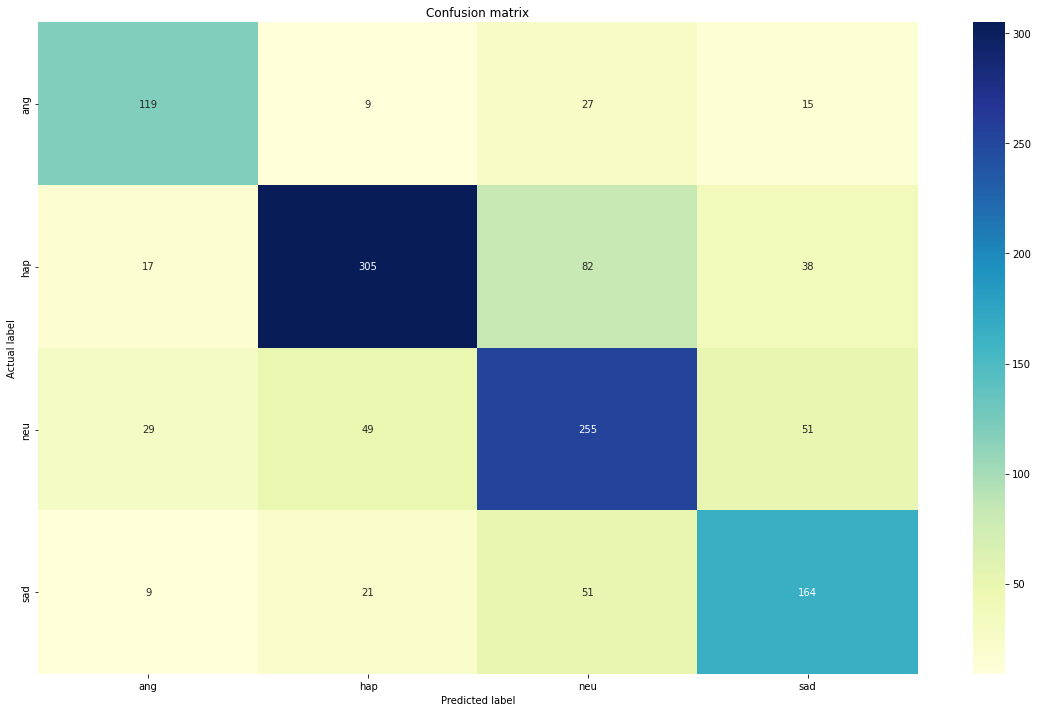

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.68      0.70      0.69       170\n           1       0.79      0.69      0.74       442\n           2       0.61      0.66      0.64       384\n           3       0.61      0.67      0.64       245\n\n    accuracy                           0.68      1241\n   macro avg       0.68      0.68      0.68      1241\nweighted avg       0.69      0.68      0.68      1241\n'

In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
543,I'll get out. I'll go get married and live som...,ang,sad,7.150008
240,I can't help it!,ang,sad,6.989588
542,"But if that can't happen, I'll just have to ge...",ang,sad,6.958081
331,I know me neither.,hap,sad,6.934249
788,Would you be willing to make some more calls o...,sad,neu,6.904751
394,because I am not getting married.,hap,ang,6.810073
685,I can't help it.,ang,sad,6.795072
393,"You should just approach her like that. Hey, w...",hap,ang,6.722865
392,just being polite now,hap,neu,6.700357
862,"Well, I don't want to, I don't want to live wi...",neu,sad,6.621854


### Test the pipeline with a sample text

In [ ]:
from transformers import pipeline

model_id = "/content/drive/MyDrive/Affective Computing/models/roberta-base-finetuned-iemocap/checkpoint-1000"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

In [ ]:
preds

[[{'label': 'LABEL_0', 'score': 0.0028779786080121994},
  {'label': 'LABEL_1', 'score': 0.01282524224370718},
  {'label': 'LABEL_2', 'score': 0.013181613758206367},
  {'label': 'LABEL_3', 'score': 0.9711151123046875}]]

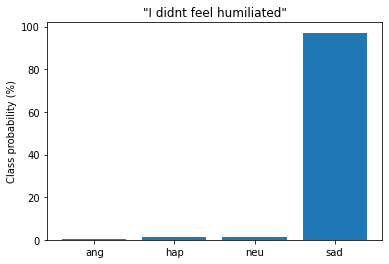

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (5,3)
plt.show()

## Hyperparameter search (Roberta)

### Tokenizing the whole dataset

In [ ]:
model_name = 'roberta-base'
num_labels = 4

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [ ]:
tokenizer.vocab_size

50265

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [0, 7608, 222, 37, 9603, 69, 259, 116, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


The `Trainer` supports hyperparameter search using [optuna](https://optuna.org/) or [Ray Tune](https://docs.ray.io/en/latest/tune/). For this last section you will need either of those libraries installed, just uncomment the line you want on the next cell and run it.

In [ ]:
! pip install -q optuna
! pip install -q ray[tune]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 39.3 MB/s eta 0:00:00


### Fine-Tunning Transformers

During hyperparameter search, the `Trainer` will run several trainings, so it needs to have the model defined via a function (so it can be reinitialized at each new run) instead of just having it passed. We just use the same function as before:

In [ ]:
from transformers import AutoModelForSequenceClassification
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(dataset_encoded["train"]) // batch_size
model_path = f"/content/drive/MyDrive/Affective Computing/models/{model_name}-finetuned-iemocap-uptuna"
training_args = TrainingArguments(output_dir=model_path,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

And we can instantiate our `Trainer` like before:

The method we call this time is `hyperparameter_search`. Note that it can take a long time to run on the full dataset for some of the tasks. You can try to find some good hyperparameter on a portion of the training dataset by replacing the `train_dataset` line above by:
```python
train_dataset = encoded_dataset["train"].shard(index=1, num_shards=10) 
```
for 1/10th of the dataset. Then you can run a full training on the best hyperparameters picked by the search.

In [ ]:
train_dataset = dataset_encoded["train"].shard(index=1, num_shards=10) 

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 326
})

In [ ]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dataset_encoded["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

[I 2023-02-09 14:10:59,426] A new study created in memory with name: no-name-89f02767-43e0-4e6f-a12f-25cc1841dae3


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.411944,0.219205,0.122331
2,No log,1.408986,0.249273,0.099864
3,No log,1.406733,0.250242,0.100175
4,No log,1.405557,0.250242,0.100175
5,No log,1.405058,0.250242,0.100175


[I 2023-02-09 14:12:01,925] Trial 0 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 3.0043704547886882e-06, 'num_train_epochs': 5, 'seed': 29, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 0.3504171310025366.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.395677,0.250242,0.100175
2,No log,1.394287,0.250242,0.100175
3,1.398400,1.392817,0.250242,0.100175


[I 2023-02-09 14:12:43,637] Trial 1 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 2.689845362025336e-06, 'num_train_epochs': 3, 'seed': 5, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.3504171310025366.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.374445,0.268671,0.159653
2,No log,1.385564,0.250242,0.100175
3,No log,1.335349,0.375364,0.340437
4,No log,1.179482,0.507274,0.501153
5,No log,1.219448,0.491756,0.496804


[I 2023-02-09 14:13:42,457] Trial 2 finished with value: 0.9885594741187728 and parameters: {'learning_rate': 6.395905421746209e-05, 'num_train_epochs': 5, 'seed': 3, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 0.9885594741187728.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.385604,0.250242,0.100175
2,No log,1.323348,0.337536,0.221511
3,No log,1.380804,0.387973,0.315486
4,No log,1.270430,0.495635,0.496787
5,1.109500,1.230029,0.532493,0.536779


[I 2023-02-09 14:14:43,510] Trial 3 finished with value: 1.0692719585349846 and parameters: {'learning_rate': 5.34479155556324e-05, 'num_train_epochs': 5, 'seed': 14, 'per_device_train_batch_size': 16}. Best is trial 3 with value: 1.0692719585349846.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.396095,0.250242,0.100175
2,No log,1.423144,0.250242,0.100175
3,1.372100,1.401161,0.250242,0.100175


[I 2023-02-09 14:15:25,326] Trial 4 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 9.981072587725428e-05, 'num_train_epochs': 3, 'seed': 33, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 1.0692719585349846.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.391629,0.290010,0.202808


[I 2023-02-09 14:15:38,868] Trial 5 finished with value: 0.4928174586788695 and parameters: {'learning_rate': 3.5062933618872197e-06, 'num_train_epochs': 1, 'seed': 32, 'per_device_train_batch_size': 16}. Best is trial 3 with value: 1.0692719585349846.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.385500,0.293889,0.133506


[I 2023-02-09 14:15:52,327] Trial 6 finished with value: 0.4273954196519587 and parameters: {'learning_rate': 4.243788497500886e-06, 'num_train_epochs': 1, 'seed': 19, 'per_device_train_batch_size': 16}. Best is trial 3 with value: 1.0692719585349846.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.385458,0.250242,0.100175
2,No log,1.384989,0.250242,0.100175


[I 2023-02-09 14:16:15,692] Trial 7 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 2.363186317168094e-06, 'num_train_epochs': 2, 'seed': 35, 'per_device_train_batch_size': 64}. Best is trial 3 with value: 1.0692719585349846.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.381474,0.250242,0.100175
2,No log,1.382799,0.250242,0.100175
3,1.376700,1.379709,0.250242,0.100175
4,1.376700,1.377334,0.250242,0.100175


[I 2023-02-09 14:17:10,136] Trial 8 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 6.231241608870916e-06, 'num_train_epochs': 4, 'seed': 38, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 1.0692719585349846.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.411929,0.250242,0.100175
2,1.381100,1.409922,0.250242,0.100175
3,1.384200,1.409186,0.250242,0.100175


[I 2023-02-09 14:17:59,581] Trial 9 finished with value: 0.3504171310025366 and parameters: {'learning_rate': 1.409924652060811e-06, 'num_train_epochs': 3, 'seed': 12, 'per_device_train_batch_size': 4}. Best is trial 3 with value: 1.0692719585349846.


The `hyperparameter_search` method returns a `BestRun` objects, which contains the value of the objective maximized (by default the sum of all metrics) and the hyperparameters it used for that run.

In [ ]:
best_run

BestRun(run_id='4', objective=0.4946999036289999, hyperparameters={'learning_rate': 2.26273433096267e-06, 'num_train_epochs': 3, 'seed': 1, 'per_device_train_batch_size': 16})

You can customize the objective to maximize by passing along a `compute_objective` function to the `hyperparameter_search` method, and you can customize the search space by passing a `hp_space` argument to `hyperparameter_search`. See this [forum post](https://discuss.huggingface.co/t/using-hyperparameter-search-in-trainer/785/10) for some examples.

To reproduce the best training, just set the hyperparameters in your `TrainingArgument` before creating a `Trainer`:

### Train a new model using best parameters

In [ ]:
best_run.hyperparameters.items()

dict_items([('learning_rate', 5.34479155556324e-05), ('num_train_epochs', 5), ('seed', 14), ('per_device_train_batch_size', 16)])

In [ ]:
# f = open("/content/drive/MyDrive/Affective Computing/Roberta2_best_run.hyperparameters.pkl","wb")

# # write the python object (dict) to pickle file
# pickle.dump(list(best_run.hyperparameters.items()),f)

# # close file
# f.close()

In [ ]:
with open('/content/drive/MyDrive/Affective Computing/Roberta2_best_run.hyperparameters.pkl', 'rb') as f:
    best_run_hyperparameters = pickle.load(f)

In [ ]:
best_run_hyperparameters = dict(best_run_hyperparameters)
best_run_hyperparameters.items()

dict_items([('learning_rate', 5.34479155556324e-05), ('num_train_epochs', 5), ('seed', 14), ('per_device_train_batch_size', 16)])

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True).to(device))

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

using best parameters

In [ ]:
for n, v in best_run_hyperparameters.items():
    setattr(trainer.args, n, v)

In [ ]:
trainer.args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_n

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    3441 MB |    7992 MB |   19771 GB |   19768 GB |\n|       from large pool |    3438 MB |    7987 MB |   19504 GB |   19500 GB |\n|       from small pool |       3 MB |      72 MB |     267 GB |     267 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    3441 MB |    7992 MB |   19771 GB |   19768 GB |\n|       from large pool |    3438 MB |    7987 MB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.372500,1.401207,0.250242,0.100175
2,1.373500,1.396260,0.250242,0.100175
3,1.374100,1.422761,0.250242,0.100175
4,1.370100,1.409747,0.250242,0.100175
5,1.367100,1.416498,0.250242,0.100175


TrainOutput(global_step=1020, training_loss=1.3688601624731924, metrics={'train_runtime': 365.7298, 'train_samples_per_second': 44.555, 'train_steps_per_second': 2.789, 'total_flos': 896014580318520.0, 'train_loss': 1.3688601624731924, 'epoch': 5.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 1.3397939205169678,
 'test_accuracy': 0.30942788074133765,
 'test_f1': 0.14624037686729066,
 'test_runtime': 7.6016,
 'test_samples_per_second': 163.256,
 'test_steps_per_second': 5.131}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

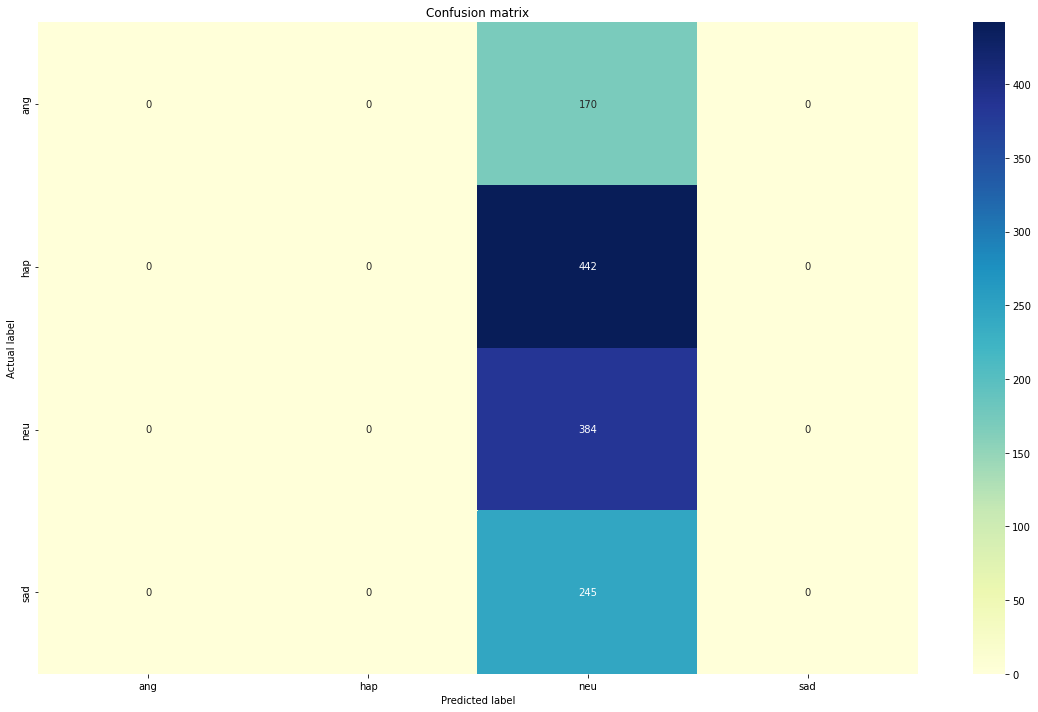

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       170\n           1       0.00      0.00      0.00       442\n           2       0.31      1.00      0.47       384\n           3       0.00      0.00      0.00       245\n\n    accuracy                           0.31      1241\n   macro avg       0.08      0.25      0.12      1241\nweighted avg       0.10      0.31      0.15      1241\n'

In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
21,They sting.,ang,neu,1.732041
272,"Well, there are people downstairs, I suppose.",ang,neu,1.732040
15,"Really, Amanda.",ang,neu,1.732040
436,You got called up.,ang,neu,1.732039
22,They snap.,ang,neu,1.732039
258,They snap.,ang,neu,1.732039
270,"You better turn that off, I think.",ang,neu,1.732039
288,"[GARBAGE] No, you're not.",ang,neu,1.732039
45,Very music- amusing indeed.,ang,neu,1.732039
248,"Me, too, bored stiff.",ang,neu,1.732039


### Test the pipeline with a sample news

In [ ]:
from transformers import pipeline

model_id = "/content/drive/MyDrive/Affective Computing/models/roberta-base-finetuned-iemocap-uptuna/checkpoint-1000"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

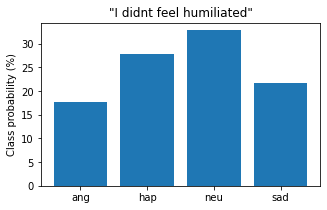

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [ ]:
push_to_hub = tensors in training_argument


trainer.push_to_hub(commit_message="Training completed!")

## Emotion Recognition using DistilBert v1.0 Model



### Tokenizing the whole dataset

In this part we use roberta for tokenization and classification.

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

اینجا رو تغییر دادم. در سایز ورودی فکر کنم مشکل داره.

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [101, 2339, 2106, 2002, 13260, 2014, 2182, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Fine-Tunning Transformers

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
model.distilbert

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [ ]:
model.classifier

Linear(in_features=768, out_features=4, bias=True)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32 
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-iemocap"
training_args = TrainingArguments(output_dir=model_name,
                                  evaluation_strategy="epoch",
                                  save_strategy="epoch",
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  load_best_model_at_end=True,
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

Cloning https://huggingface.co/Zahra99/distilbert-base-uncased-finetuned-iemocap into local empty directory.


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  262659 KB |  262659 KB |  262659 KB |       0 B  |\n|       from large pool |  262400 KB |  262400 KB |  262400 KB |       0 B  |\n|       from small pool |     259 KB |     259 KB |     259 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |  262659 KB |  262659 KB |  262659 KB |       0 B  |\n|       from large pool |  262400 KB |  262400 KB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.202800,1.099432,0.541222,0.546450
2,0.887900,0.955654,0.606208,0.614382
3,0.684600,0.911310,0.640155,0.645900
4,0.542800,0.959229,0.634336,0.640963
5,0.438900,1.074774,0.617847,0.631543
6,0.372900,1.074339,0.624636,0.636094
7,0.305100,1.080741,0.643065,0.652663
8,0.271200,1.100070,0.642095,0.651021
9,0.239000,1.121204,0.639185,0.649033
10,0.218800,1.132206,0.643065,0.652058


TrainOutput(global_step=1020, training_loss=0.5136152209020128, metrics={'train_runtime': 619.1591, 'train_samples_per_second': 52.636, 'train_steps_per_second': 1.647, 'total_flos': 910673402627520.0, 'train_loss': 0.5136152209020128, 'epoch': 10.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 0.9055968523025513,
 'test_accuracy': 0.6438356164383562,
 'test_f1': 0.6452748958505777,
 'test_runtime': 4.4809,
 'test_samples_per_second': 276.956,
 'test_steps_per_second': 8.704}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

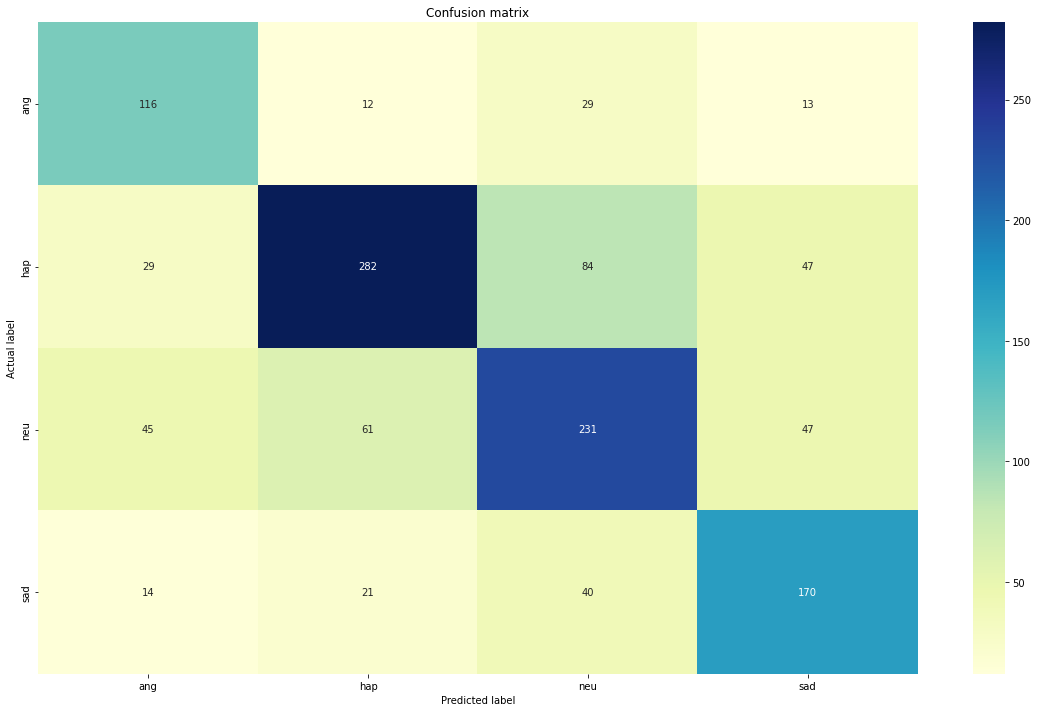

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.57      0.68      0.62       170\n           1       0.75      0.64      0.69       442\n           2       0.60      0.60      0.60       384\n           3       0.61      0.69      0.65       245\n\n    accuracy                           0.64      1241\n   macro avg       0.63      0.65      0.64      1241\nweighted avg       0.65      0.64      0.65      1241\n'

In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
394,because I am not getting married.,hap,ang,4.097989
102,"You marry his girl, and you're pronouncing him...",sad,ang,4.075760
309,I've given it three years of thought. I had ho...,ang,sad,3.992332
541,I've given it three years of thought. I hoped ...,ang,sad,3.978736
1059,"Oh, my gosh.",sad,hap,3.870656
653,"Sure, this is standing. This is waiting. This ...",sad,ang,3.842716
736,"No, I don't think I am. I like have a whole bu...",ang,sad,3.806968
788,Would you be willing to make some more calls o...,sad,ang,3.804262
437,I thought you said this wasn't going to happen...,ang,sad,3.789309
685,I can't help it.,ang,sad,3.753634


### Test the pipeline with a sample text

In [ ]:
from transformers import pipeline

model_id = "Zahra99/distilbert-base-uncased-finetuned-iemocap"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

In [ ]:
preds

[[{'label': 'LABEL_0', 'score': 0.015061297453939915},
  {'label': 'LABEL_1', 'score': 0.02977946028113365},
  {'label': 'LABEL_2', 'score': 0.03981311619281769},
  {'label': 'LABEL_3', 'score': 0.915346086025238}]]

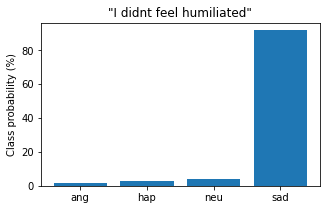

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (5,3)
plt.show()

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Emotion Recognition using XLNet v1.0 Model



### Tokenizing the whole dataset

In this part we use roberta for tokenization and classification.

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "xlnet-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

اینجا رو تغییر دادم. در سایز ورودی فکر کنم مشکل داره.

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

In [ ]:
print(tokenize(dataset["train"][0]))

{'input_ids': [101, 2339, 2106, 2002, 13260, 2014, 2182, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(dataset_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Fine-Tunning Transformers

You will see a warning that some parts of the model are randomly initialized.
This is normal since the classification head has not yet been trained. The n

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 4
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
model.distilbert

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [ ]:
model.classifier

Linear(in_features=768, out_features=4, bias=True)

### Training the model

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32 
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-iemocap"
training_args = TrainingArguments(output_dir=model_name,
                                  evaluation_strategy="epoch",
                                  save_strategy="epoch",
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  load_best_model_at_end=True,
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)

Cloning https://huggingface.co/Zahra99/distilbert-base-uncased-finetuned-iemocap into local empty directory.


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  262659 KB |  262659 KB |  262659 KB |       0 B  |\n|       from large pool |  262400 KB |  262400 KB |  262400 KB |       0 B  |\n|       from small pool |     259 KB |     259 KB |     259 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |  262659 KB |  262659 KB |  262659 KB |       0 B  |\n|       from large pool |  262400 KB |  262400 KB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.202800,1.099432,0.541222,0.546450
2,0.887900,0.955654,0.606208,0.614382
3,0.684600,0.911310,0.640155,0.645900
4,0.542800,0.959229,0.634336,0.640963
5,0.438900,1.074774,0.617847,0.631543
6,0.372900,1.074339,0.624636,0.636094
7,0.305100,1.080741,0.643065,0.652663
8,0.271200,1.100070,0.642095,0.651021
9,0.239000,1.121204,0.639185,0.649033
10,0.218800,1.132206,0.643065,0.652058


TrainOutput(global_step=1020, training_loss=0.5136152209020128, metrics={'train_runtime': 619.1591, 'train_samples_per_second': 52.636, 'train_steps_per_second': 1.647, 'total_flos': 910673402627520.0, 'train_loss': 0.5136152209020128, 'epoch': 10.0})

### Evaluation on the Test set

In [ ]:
preds_output_test = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output_test.metrics

{'test_loss': 0.9055968523025513,
 'test_accuracy': 0.6438356164383562,
 'test_f1': 0.6452748958505777,
 'test_runtime': 4.4809,
 'test_samples_per_second': 276.956,
 'test_steps_per_second': 8.704}

In [ ]:
y_test = np.array(dataset_encoded["test"]["label"])

In [ ]:
y_preds_test = np.argmax(preds_output_test.predictions, axis=1)

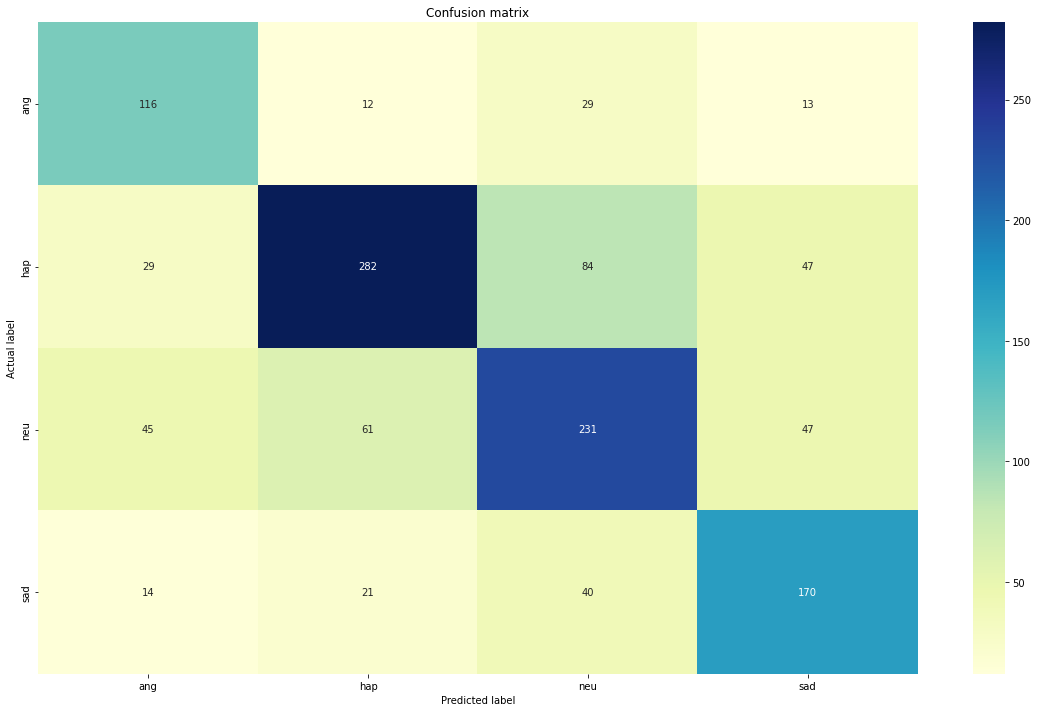

In [ ]:
confusion_matrix(y_test, y_preds_test)

In [ ]:
classification_report(y_test, y_preds_test)

'              precision    recall  f1-score   support\n\n           0       0.57      0.68      0.62       170\n           1       0.75      0.64      0.69       442\n           2       0.60      0.60      0.60       384\n           3       0.61      0.69      0.65       245\n\n    accuracy                           0.64      1241\n   macro avg       0.63      0.65      0.64      1241\nweighted avg       0.65      0.64      0.65      1241\n'

In [ ]:
# Convert our dataset back to PyTorch tensors
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask",
"label"])
# Compute loss values
dataset_encoded["test"] = dataset_encoded["test"].map(
  forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/78 [00:00<?, ?ba/s]

In [ ]:
dataset_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = dataset_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(inverse)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(inverse)) 

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
394,because I am not getting married.,hap,ang,4.097989
102,"You marry his girl, and you're pronouncing him...",sad,ang,4.075760
309,I've given it three years of thought. I had ho...,ang,sad,3.992332
541,I've given it three years of thought. I hoped ...,ang,sad,3.978736
1059,"Oh, my gosh.",sad,hap,3.870656
653,"Sure, this is standing. This is waiting. This ...",sad,ang,3.842716
736,"No, I don't think I am. I like have a whole bu...",ang,sad,3.806968
788,Would you be willing to make some more calls o...,sad,ang,3.804262
437,I thought you said this wasn't going to happen...,ang,sad,3.789309
685,I can't help it.,ang,sad,3.753634


### Test the pipeline with a sample text

In [ ]:
from transformers import pipeline

model_id = "Zahra99/distilbert-base-uncased-finetuned-iemocap"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_news = "I didnt feel humiliated"
preds = classifier(custom_news, return_all_scores=True)

In [ ]:
preds

[[{'label': 'LABEL_0', 'score': 0.015061297453939915},
  {'label': 'LABEL_1', 'score': 0.02977946028113365},
  {'label': 'LABEL_2', 'score': 0.03981311619281769},
  {'label': 'LABEL_3', 'score': 0.915346086025238}]]

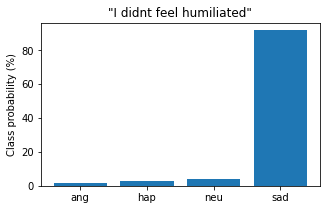

In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(classes, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_news}"')
plt.ylabel("Class probability (%)")
plt.rcParams["figure.figsize"] = (5,3)
plt.show()

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /root/.cache/huggingface/token
Login successful
